C:\Users\Swardi\AppData\Local\Temp\ipykernel_16960\1792435507.py:35: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='average')


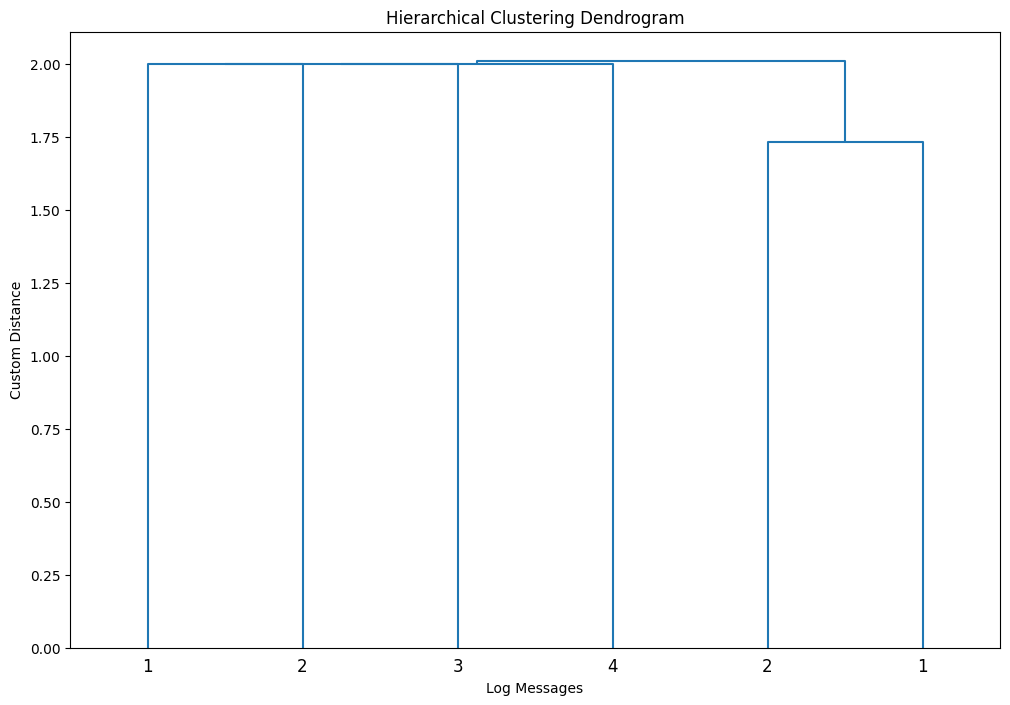

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Sample data - replace this with your actual data
data = {
    'log_messages': [
        'drone took off',
        'altitude reached 100 meters',
        'heading north',
        'battery level low',
        'emergency landing',
        'drone landed safely',
        # Add more log messages...
    ],
    'labels': [1, 2, 1, 3, 4, 2]  # Replace with your actual labels
}

df = pd.DataFrame(data)

# Custom distance metric function
def custom_distance_metric(X, Y):
    # Replace this with your own logic to calculate the distance
    # This is just a placeholder example using TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(X)
    Y_tfidf = vectorizer.transform(Y)
    return pairwise_distances(X_tfidf, Y_tfidf, metric='cosine')

# Hierarchical clustering
distances = custom_distance_metric(df['log_messages'], df['log_messages'])
linkage_matrix = linkage(distances, method='average')

# Dendrogram visualization
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df['labels'].tolist(), orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Log Messages')
plt.ylabel('Custom Distance')
plt.show()


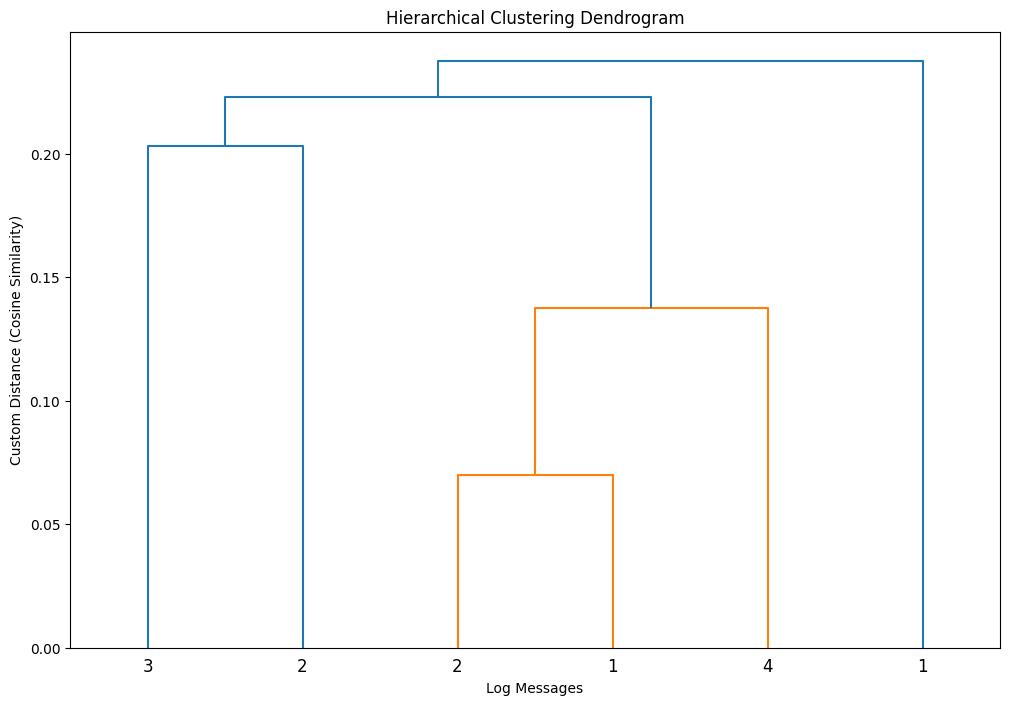

In [3]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Sample data - replace this with your actual data
data = {
    'log_messages': [
        'drone took off',
        'altitude reached 100 meters',
        'heading north',
        'battery level low',
        'emergency landing',
        'drone landed safely',
        # Add more log messages...
    ],
    'labels': [1, 2, 1, 3, 4, 2]  # Replace with your actual labels
}

df = pd.DataFrame(data)

# Load pre-trained Sentence-BERT model
sbert_model = SentenceTransformer('paraphrase-mpnet-base-v2')

# Custom distance metric function using SBERT embeddings
def custom_distance_metric(X, Y):
    # Encode log messages into SBERT embeddings
    X_embeddings = sbert_model.encode(X, convert_to_tensor=True)
    Y_embeddings = sbert_model.encode(Y, convert_to_tensor=True)
    
    # Calculate cosine similarity as the distance metric
    return 1 - np.dot(X_embeddings, Y_embeddings.T) / (np.linalg.norm(X_embeddings) * np.linalg.norm(Y_embeddings))

# Hierarchical clustering
distances = custom_distance_metric(df['log_messages'], df['log_messages'])
linkage_matrix = linkage(distances, method='average')

# Dendrogram visualization
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df['labels'].tolist(), orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Log Messages')
plt.ylabel('Custom Distance (Cosine Similarity)')
plt.show()


Dendrogram Purity: 0.33


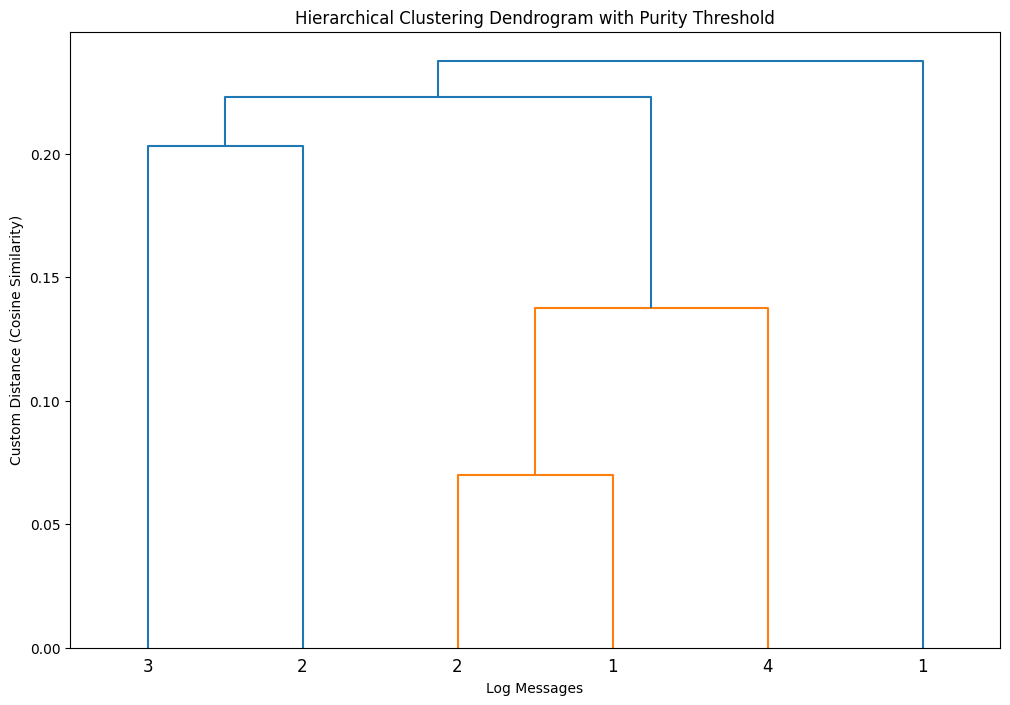

In [4]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import accuracy_score

# Sample data - replace this with your actual data
data = {
    'log_messages': [
        'drone took off',
        'altitude reached 100 meters',
        'heading north',
        'battery level low',
        'emergency landing',
        'drone landed safely',
        # Add more log messages...
    ],
    'labels': [1, 2, 1, 3, 4, 2]  # Replace with your actual labels
}

df = pd.DataFrame(data)

# Load pre-trained Sentence-BERT model
sbert_model = SentenceTransformer('paraphrase-mpnet-base-v2')

# Custom distance metric function using SBERT embeddings
def custom_distance_metric(X, Y):
    # Encode log messages into SBERT embeddings
    X_embeddings = sbert_model.encode(X, convert_to_tensor=True)
    Y_embeddings = sbert_model.encode(Y, convert_to_tensor=True)
    
    # Calculate cosine similarity as the distance metric
    return 1 - np.dot(X_embeddings, Y_embeddings.T) / (np.linalg.norm(X_embeddings) * np.linalg.norm(Y_embeddings))

# Hierarchical clustering
distances = custom_distance_metric(df['log_messages'], df['log_messages'])
linkage_matrix = linkage(distances, method='average')

# Dendrogram visualization
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df['labels'].tolist(), orientation='top', distance_sort='descending')

# Add a horizontal line to visually set a purity threshold
purity_threshold = 0.5  # Adjust this threshold as needed
plt.axhline(y=purity_threshold, color='r', linestyle='--')

plt.title('Hierarchical Clustering Dendrogram with Purity Threshold')
plt.xlabel('Log Messages')
plt.ylabel('Custom Distance (Cosine Similarity)')

# Determine flat clusters based on the purity threshold
flat_clusters = fcluster(linkage_matrix, t=purity_threshold, criterion='distance')

# Calculate dendrogram purity for each flat cluster
unique_labels = np.unique(df['labels'])
dendrogram_purity = 0.0

for cluster_label in np.unique(flat_clusters):
    cluster_indices = np.where(flat_clusters == cluster_label)[0]
    true_labels = df['labels'].iloc[cluster_indices]
    majority_label = np.argmax(np.bincount(true_labels))
    cluster_purity = np.sum(true_labels == majority_label) / len(true_labels)
    dendrogram_purity += (len(cluster_indices) / len(df)) * cluster_purity

print(f'Dendrogram Purity: {dendrogram_purity:.2f}')

# Show the plot
plt.show()
